OTSU

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
import skimage.filters

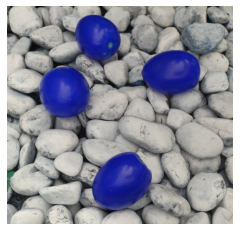

In [213]:
s_image = cv2.imread('Jit1.JPG')

plt.axis('off')
plt.imshow(s_image)

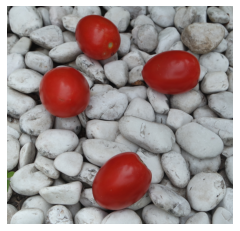

In [214]:
img = cv2.cvtColor(s_image,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

###Segmentacion por kmeans

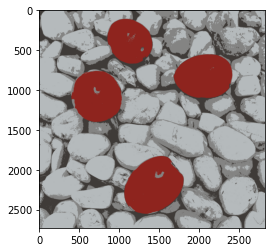

In [215]:
k = 4

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)

# show the image
plt.imshow(segmented_image)
plt.show()

Segunda segmentacion por colores

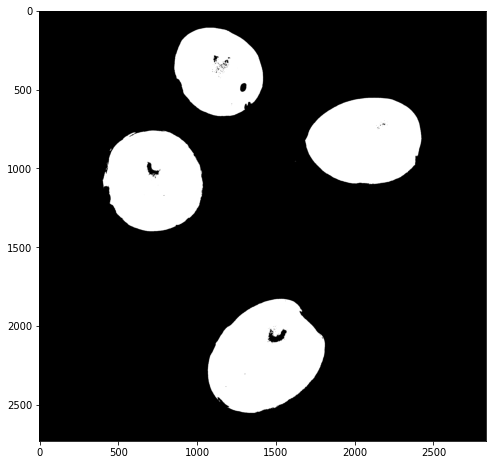

In [216]:
umbral_bajo = np.array([139,35,29])
umbral_alto = np.array([142,36,30])
mask_red = cv2.inRange(segmented_image, umbral_bajo, umbral_alto)
#any value that is not in the range of the mask, thershold
#res = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(8,8))
plt.imshow(mask_red, cmap = 'gray')


Suavizado de imagen

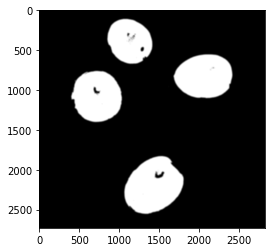

In [217]:
blur = cv2.blur(mask_red,(20,20))
plt.imshow(blur, 'gray')

Deteccion de contornos con Canny

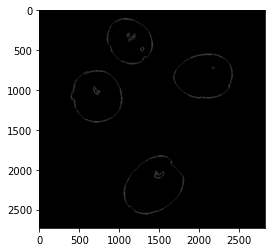

In [218]:
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
  
# Applying the Canny Edge filter
edge_canny = cv2.Canny(blur, 50, 40)

plt.imshow(edge_canny,'gray')

Erosionar para evitar conflictos

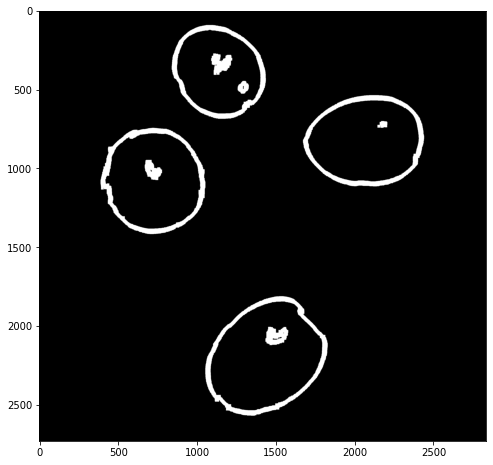

In [219]:
kernel = np.ones((5, 5), np.uint8)
 
img_erosion = cv2.erode(edge_canny, kernel, iterations=5)
img_dilation = cv2.dilate(edge_canny, kernel, iterations=4)
plt.figure(figsize=(8,8))
plt.imshow(img_dilation, 'gray')

Obtencion de objetos

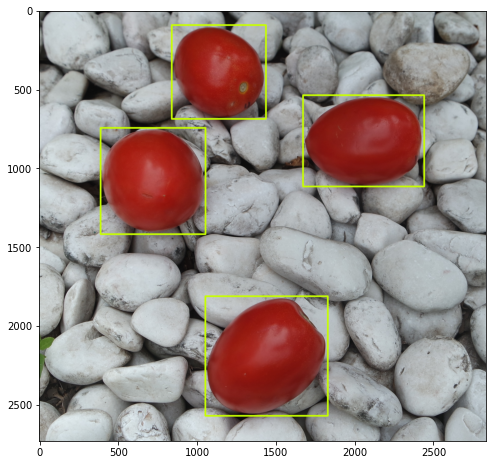

In [220]:
contours,hierarchy = cv2.findContours(img_dilation,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    masked_image = cv2.rectangle(img,(x,y),(x+w,y+h),(200,255,0),10)
plt.figure(figsize =(8,8))
plt.imshow(img)

In [221]:
print("Se detectaron {} objetos".format(len(contours)))

Se detectaron 4 objetos


In [222]:
cnt=contours[2]
izquierdo = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho = tuple(cnt[cnt[:,:,0].argmax()][0])
superior = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior = tuple(cnt[cnt[:,:,1].argmax()][0])
print("Cordenadas de mdecion [OBJETO 2]")
print("Coordenada 1",derecho)
print("Coordenada 2",izquierdo)

Cordenadas de mdecion [OBJETO 2]
Coordenada 1 (2440, 815)
Coordenada 2 (1673, 822)


In [223]:
cnt=contours[0]
izquierdo0 = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho0 = tuple(cnt[cnt[:,:,0].argmax()][0])
superior0 = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior0 = tuple(cnt[cnt[:,:,1].argmax()][0])
print("Cordenadas de mdecion [OBJETO 4]")
print("Coordenada 1",superior0)
print("Coordenada 2",inferior0)

Cordenadas de mdecion [OBJETO 4]
Coordenada 1 (1522, 1812)
Coordenada 2 (1344, 2568)


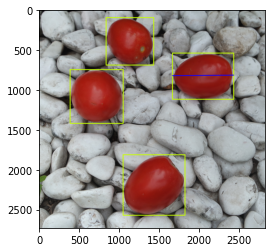

In [224]:
start_point=(izquierdo[0], izquierdo[1])
end_point=(derecho[0], derecho[1])
thickness = 10
color = (13, 0, 255)

l1 = cv2.line(img, start_point, end_point, color, thickness) 
plt.imshow(l1)

In [225]:
a = np.array((izquierdo[0], izquierdo[1], 1))
b = np.array((derecho[0], derecho[1], 1))

dist = np.sqrt(np.sum(np.square(a-b)))

print("Distancia de objeto 2:\t",dist)

Distancia de objeto 2:	 767.0319419685206


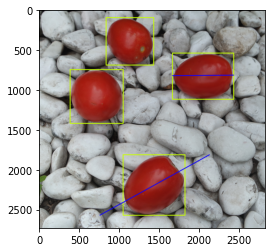

In [226]:
a = inferior0[0] - izquierdo0[0]
b = inferior0[1] - izquierdo0[1]
xa_1=(a,b)
c = derecho0[0]-superior0[0]
d = derecho0[1]-superior0[1]
ya_1=(c,d)

start_point1=(izquierdo0[0] - xa_1[0],izquierdo0[1]+ xa_1[1])
end_point1=(derecho0[0] + ya_1[0],derecho0[1] - ya_1[1])

l2 = cv2.line(img, start_point1, end_point1, color, thickness) 
#dibujar_distancia(sample_image,x_1, y_1)
plt.imshow(l2)

In [227]:
q = np.array((xa_1[0],xa_1[1] , 1))
p = np.array((ya_1[0], ya_1[1], 1))

dist2 = np.sqrt(np.sum(np.square(p-q)))

print("Distancia de objeto 4:\t",dist2)

Distancia de objeto 4:	 23.345235059857504


In [228]:
cnt=contours[1]
izquierdo1 = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho1 = tuple(cnt[cnt[:,:,0].argmax()][0])
superior1 = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior1 = tuple(cnt[cnt[:,:,1].argmax()][0])


cnt=contours[3]
izquierdo3 = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho3 = tuple(cnt[cnt[:,:,0].argmax()][0])
superior3 = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior3 = tuple(cnt[cnt[:,:,1].argmax()][0])


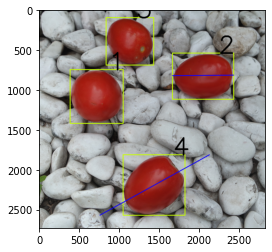

In [229]:
a=(superior1[0],superior1[1])
b=(superior[0],superior[1])
c=(superior3[0],superior3[1])
d=(superior0[0],superior0[1])

font = cv2.FONT_HERSHEY_SIMPLEX
u1=cv2.putText(img,' 1',a,font,10,(0,0,0),20,cv2.LINE_AA)
u2=cv2.putText(img,' 2',b,font,10,(0,0,0),20,cv2.LINE_AA)
u3=cv2.putText(img,' 3',c,font,10,(0,0,0),20,cv2.LINE_AA)
u4=cv2.putText(img,' 4',d,font,10,(0,0,0),20,cv2.LINE_AA)

plt.imshow(u1)
plt.imshow(u2)
plt.imshow(u3)
plt.imshow(u4)